<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Machine_Learning_Practice_Master/blob/Develope/proj_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the name of GOD**

# Mohammad Mahdi Shafighy

Project 1

1403.09.01

In [43]:
# Load synthetic dataset
file_path = "/content/housing.csv"
df = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Loaded:")
df.info()
df.describe()

df.head()



Dataset Loaded:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
# Check for missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Fill missing values (no missing values expected, but generalized)
numeric_cols = df.select_dtypes(include=np.number).columns  # Get numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print("\nMissing Values After Handling:")
df.isnull().sum()



Missing Values Before Handling:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing Values After Handling:


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# 1. جمع‌آوری داده‌ها
در این مرحله داده‌های مصنوعی که در فایل CSV ذخیره شده‌اند بارگذاری می‌شوند


In [45]:
import pandas as pd

# Load synthetic dataset
file_path = "/content/housing.csv"
df = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Loaded:")
df.head()

Dataset Loaded:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2. پیش‌پردازش داده‌ها
شناسایی داده‌های گمشده و پر کردن آنها

In [46]:
# Check for missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Fill missing values (no missing values expected, but generalized)
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


print("\nMissing Values After Handling:")
df.isnull().sum()


Missing Values Before Handling:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing Values After Handling:


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


# شناسایی و مدیریت داده‌های پرت

In [47]:
for col in ['housing_median_age', 'total_rooms', 'population']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # شناسایی نقاط پرت بدون جایگذاری آن
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n{outliers}\n")

Outliers in housing_median_age:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

Outliers in total_rooms:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                21.0       7099.0          1106.0   
101      -122.25     37.81                28.0       5806.0          1603.0   
104      -122.26     37.81                34.0       5871.0          1914.0   
185      -122.23     37.79                43.0       5963.0          1344.0   
283      -122.16     37.79                22.0      12842.0          2048.0   
...          ...       ...                 ...          ...             ...   
20543    -121.74     38.55                33.0       6861.0          1820.0   
20544    -121.76     38.55                23.0       8800.0          1857.0   
20563    -121.75     38.67                 9.0   

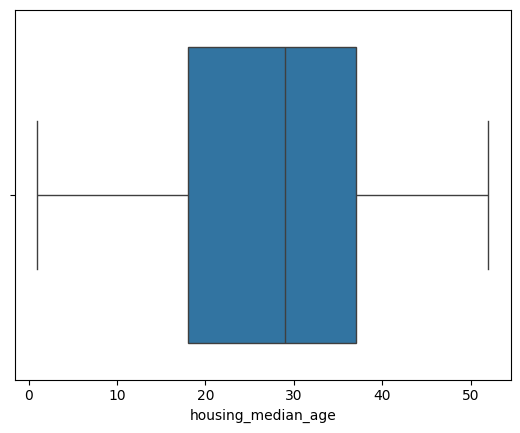

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['housing_median_age'])
plt.show()

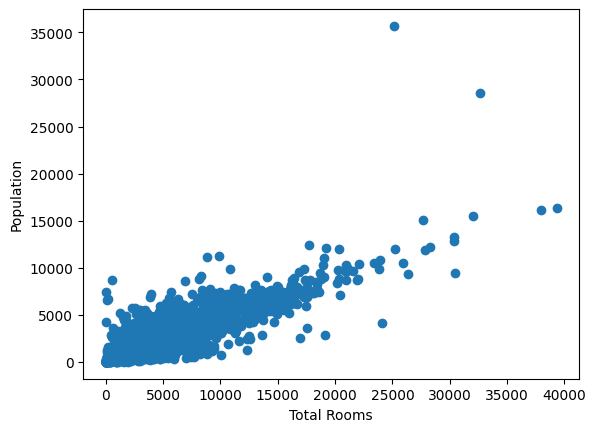

In [49]:
plt.scatter(df['total_rooms'], df['population'])
plt.xlabel('Total Rooms')
plt.ylabel('Population')
plt.show()

In [50]:
from scipy import stats

z = np.abs(stats.zscore(df['housing_median_age']))
outliers = np.where(z > 3)
print(f"Outliers using Z-score:\n{outliers}\n")

Outliers using Z-score:
(array([], dtype=int64),)



# اعمال One-Hot Encoding

In [51]:
# Apply One-Hot Encoding for 'ocean_proximity' if not encoded
# Check if 'ocean_proximity' is in the DataFrame columns
if 'ocean_proximity' in df.columns:
    df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

    print("\nDataset after One-Hot Encoding:")
    df.head()
else:
    print("\n'ocean_proximity' column not found in the DataFrame.")


Dataset after One-Hot Encoding:


# 3. تحلیل داده‌ها


*   ایجاد ماتریس پراکندگی و ضریب همبستگی


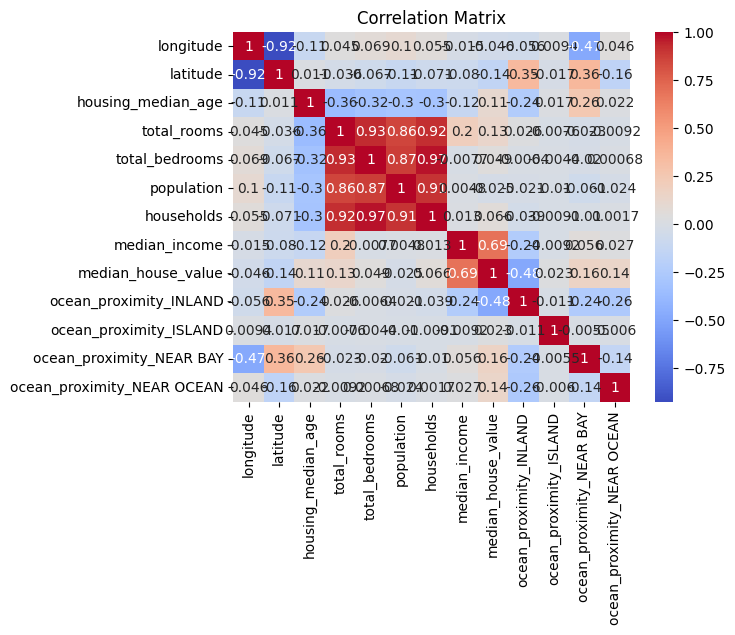

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# ماتریس همبستگی
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 4. تقسیم داده‌ها

*   تقسیم داده‌ها به مجموعه‌های آموزش و تست


In [53]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('median_house_value', axis=1)  # Target column
y = df['median_house_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. ساخت مدل
*   ساخت مدل رگرسیون خطی، آموزش و ارزیابی


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print(y_pred)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

[ 64629.45079787 134799.34083606 266063.38139053 ... 439180.9834118
 120797.55240621 183386.04993584]

Mean Squared Error: 4904399775.949265
R^2 Score: 0.6257351821159713


# 6. تجزیه و تحلیل نتایج


*   تحلیل باقی‌مانده‌ها


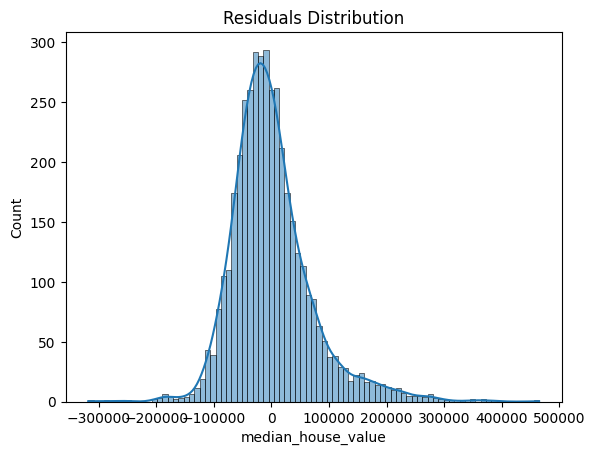

In [57]:
# Residual Analysis
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

# ضرایب مدل

*   ضرایب ویژگی‌ها نشان‌دهنده تأثیر هر ویژگی بر قیمت خانه است

 به عنوان مثال، درآمد میانه

 (median_income)

 بیشترین تأثیر مثبت را دارد، در حالی که فاصله از اقیانوس

 (ocean_proximity_INLAND)

 تأثیر منفی قابل توجهی بر قیمت‌ها دارد

In [56]:
# Display Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")



Model Coefficients:
longitude: -26838.273372469055
latitude: -25468.35204987842
housing_median_age: 1102.185083971667
total_rooms: -6.021505665532459
total_bedrooms: 102.78939539109251
population: -38.172906426199916
households: 48.252752786974725
median_income: 39473.97517531756
ocean_proximity_INLAND: -39786.65616133179
ocean_proximity_ISLAND: 136125.0726154177
ocean_proximity_NEAR BAY: -5136.642217476632
ocean_proximity_NEAR OCEAN: 3431.140073154216


# نتایج ضرایب:


*   longitude: -29,388 (تأثیر منفی)

*   latitude: -28,586 (تأثیر منفی)

*   median_income: +33,642 (بیشترین تأثیر مثبت)




# چالش‌ها و روش‌های بهبود مدل

1.   چالش‌ها:
*   داده‌ها ممکن است به صورت کامل بازتاب‌دهنده واقعیت نباشند
(مشکلات داده‌های مصنوعی)
*   خطای مدل نشان می‌دهد که ویژگی‌های بیشتری ممکن است مورد نیاز باشند

*   داده‌های پرت می‌توانند عملکرد مدل را کاهش دهند

2.   روش‌های بهبود:
*   استفاده از ویژگی‌های بیشتر (مانند زیرساخت‌های محلی)

*   آزمایش مدل‌های پیچیده‌تر مانند رگرسیون چندجمله‌ای یا مدل‌های مبتنی بر درخت (مانند Random Forest)

*   بهینه‌سازی داده‌ها با تکنیک‌های پیشرفته‌تر مانند PCA برای کاهش ابعاد






